# Project 3: Web APIs & NLP

In [170]:
# Import packages
import numpy as np
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [171]:
reddit_data = pd.read_csv('./data/reddit_data.csv')
reddit_data.head()

,Unnamed: 0,created_utc,title,self_text,subreddit,score,num_comments
0,0,1.709248e+09,Jim Mordecai and the Santa Rosa Hitchhiker Mur...,Was Mordecai the serial killer who abducted an...,UnresolvedMysteries,20,10
1,1,1.709228e+09,A ten year old goes out to run errands and nev...,Ten-year-old Mary Ann Verdecchia was excited o...,UnresolvedMysteries,168,20
2,2,1.709215e+09,A Shadow Over Leigh: The Unsolved Murder of 14...,**Background** \nLisa Hession was a 14 year o...,UnresolvedMysteries,121,13
3,3,1.709175e+09,Tera Tracy,Saw this story online and thought it was worth...,UnresolvedMysteries,53,8
4,4,1.709069e+09,The Boy and the Bike: the Disappearance of Dav...,"I know this has been covered a few times, but ...",UnresolvedMysteries,337,51


In [172]:
reddit_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [173]:
reddit_data.shape

(4788, 6)

In [174]:
reddit_data["subreddit"].value_counts()

subreddit
FanTheories            2451
UnresolvedMysteries    2337
Name: count, dtype: int64

In [177]:
reddit_data.head()

,created_utc,title,self_text,subreddit,score,num_comments,target
0,1.709248e+09,Jim Mordecai and the Santa Rosa Hitchhiker Mur...,Was Mordecai the serial killer who abducted an...,UnresolvedMysteries,20,10,1
1,1.709228e+09,A ten year old goes out to run errands and nev...,Ten-year-old Mary Ann Verdecchia was excited o...,UnresolvedMysteries,168,20,1
2,1.709215e+09,A Shadow Over Leigh: The Unsolved Murder of 14...,**Background** \nLisa Hession was a 14 year o...,UnresolvedMysteries,121,13,1
3,1.709175e+09,Tera Tracy,Saw this story online and thought it was worth...,UnresolvedMysteries,53,8,1
4,1.709069e+09,The Boy and the Bike: the Disappearance of Dav...,"I know this has been covered a few times, but ...",UnresolvedMysteries,337,51,1


In [178]:
reddit_data.isna().sum()

created_utc      0
title            0
self_text       57
subreddit        0
score            0
num_comments     0
target           0
dtype: int64

In [179]:
reddit_data = reddit_data.dropna()

In [180]:
reddit_data.isna().sum()

created_utc     0
title           0
self_text       0
subreddit       0
score           0
num_comments    0
target          0
dtype: int64

In [181]:
reddit_data.shape

(4731, 7)

EDA

In [182]:
reddit_data.dtypes

created_utc     float64
title            object
self_text        object
subreddit        object
score             int64
num_comments      int64
target            int32
dtype: object

In [183]:
reddit_data.describe()

,created_utc,score,num_comments,target
count,4.731000e+03,4731.000000,4731.000000,4731.000000
mean,1.652332e+09,1357.891989,144.878250,0.492496
std,6.808914e+07,2129.159516,266.007668,0.499997
min,1.352556e+09,0.000000,0.000000,0.000000
25%,1.604632e+09,72.500000,15.000000,0.000000
50%,1.693389e+09,501.000000,63.000000,0.000000
75%,1.701396e+09,2118.000000,172.500000,1.000000
max,1.709248e+09,62418.000000,5137.000000,1.000000


In [184]:
reddit_data[reddit_data['score'] == 62418]

,created_utc,title,self_text,subreddit,score,num_comments,target
1341,1.607713e+09,FBI confirms that the Zodiac Killer’s “340 Cyp...,The Zodiac Killer is an unidentified serial ki...,UnresolvedMysteries,62418,2844,1


In [185]:
reddit_data = reddit_data.drop(index=[1341])

In [186]:
reddit_data.describe()

,created_utc,score,num_comments,target
count,4.730000e+03,4730.000000,4730.000000,4730.000000
mean,1.652342e+09,1344.982875,144.307611,0.492389
std,6.809324e+07,1935.384620,263.123863,0.499995
min,1.352556e+09,0.000000,0.000000,0.000000
25%,1.604607e+09,72.250000,15.000000,0.000000
50%,1.693391e+09,500.500000,63.000000,0.000000
75%,1.701396e+09,2118.000000,172.000000,1.000000
max,1.709248e+09,29997.000000,5137.000000,1.000000


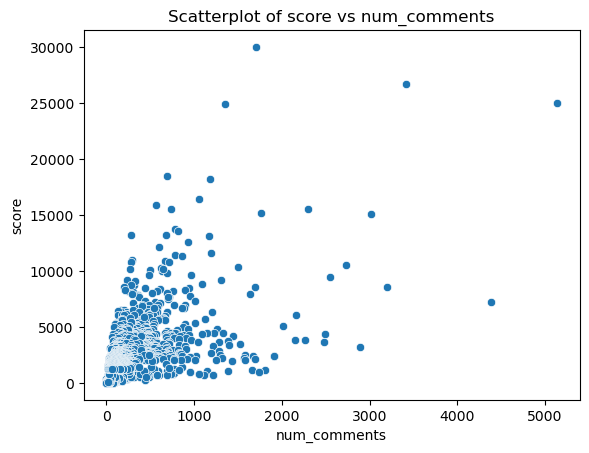

In [187]:
sns.scatterplot(data=reddit_data, x='num_comments', y='score')
plt.title('Scatterplot of score vs num_comments');

In [188]:
def top_posts(df, value):
    top_title = []
    for i in range(value):
        top_title.append(df.title.value_counts().index[i])
    return top_title

In [189]:
top_posts = top_posts(reddit_data, 5)
top_posts

["[Groundhog Day] Ned Ryerson is the devil, and he imprisons Phil Conners in the time loop when Phil refuses to purchase Ned's insurance. The only way Phil escapes is by finally agreeing to buy it.",
 'Batman never shows up to court',
 'What’s a case where you believe the person is alive/ being kept hostage/confined ?',
 'In honor of the International Day of Older Persons and in order to combat ageism in the true crime community, I wanted to share an EXPANDED collection of the stories of older people who have gone missing or whose stories are otherwise unresolved',
 'In 2005, an infant was found dead in a trash can at a Phoenix airport. She was given the nickname Baby Skylar by investigators. Her mother was just arrested for her murder.']

In [190]:
reddit_data['post_length'] = reddit_data['self_text'].map(len)

In [191]:
reddit_data['post_word_count'] = reddit_data['self_text'].map(lambda x: len(x.split()))

In [192]:
reddit_data['ratio'] = reddit_data.post_length/reddit_data.post_word_count

In [193]:
reddit_data[['post_length','post_word_count','ratio']].describe()

,post_length,post_word_count,ratio
count,4730.000000,4730.000000,4730.000000
mean,3673.293023,582.831924,6.263889
std,4681.000834,738.407804,1.865190
min,6.000000,1.000000,3.875000
25%,1086.500000,177.000000,5.620000
50%,2078.500000,330.500000,5.957941
75%,4256.000000,678.000000,6.535073
max,38584.000000,6586.000000,97.710145


In [194]:
# Top 10 Shortest post for reddit_data
reddit_data.sort_values(by='post_word_count', ascending=True)[['subreddit','post_word_count','post_length','ratio','self_text','score','num_comments']].head(10)

,subreddit,post_word_count,post_length,ratio,self_text,score,num_comments
4230,FanTheories,1,6,6.000000,Right?,1822,207
3839,FanTheories,3,12,4.000000,Which is it?,4538,131
1359,UnresolvedMysteries,5,83,16.600000,[Link can be found here](http://www.sacbee.com...,11639,1192
4338,FanTheories,7,33,4.714286,He succumbed to the sin of pride.,1676,171
3863,FanTheories,8,57,7.125000,A Demi-god's microaggression\n\nEdit: FULL god...,3726,144
4627,FanTheories,8,31,3.875000,He was made by a nine year old,1388,115
2304,UnresolvedMysteries,11,53,4.818182,"And yes, they did give credit to the DNA Doe p...",2031,210
4551,FanTheories,20,126,6.300000,I believe that neither Wolverine nor Deadpool ...,1444,139
2285,UnresolvedMysteries,21,625,29.761905,[Announcement](https://www.hollywoodreporter.c...,2059,136
1808,UnresolvedMysteries,22,127,5.772727,Husband: “ what are you looking up online?”\n\...,3003,415


In [195]:
# Top 10 Longest post for reddit_data

reddit_data.sort_values(by='post_word_count', ascending=False)[['subreddit','post_word_count','post_length','ratio','self_text','score','num_comments']].head(10)

,subreddit,post_word_count,post_length,ratio,self_text,score,num_comments
2332,UnresolvedMysteries,6586,38584,5.858488,"On August 18th 2010, [Ben McDaniel](https://im...",1997,521
1547,UnresolvedMysteries,6457,36279,5.618554,"March 2, 1978. An old woman lay in bed, but sh...",4281,303
2005,UnresolvedMysteries,6411,37699,5.880362,"On 30.06.2014, Lars Mittank flew with three fr...",2497,250
3796,FanTheories,6275,37864,6.034104,**This theory has a lot of evidence and took a...,10293,626
890,UnresolvedMysteries,5940,34575,5.820707,ETA: There should be a period at the end of th...,746,179
1798,UnresolvedMysteries,5915,34518,5.835672,I’ve been captivated by this one for a while. ...,3063,195
1366,UnresolvedMysteries,5729,35162,6.137546,"In Waidhofen, Germany, on the night of March 3...",10036,633
640,UnresolvedMysteries,5716,35580,6.224633,"Cloverdale, B.C. - On June 23, 2018 around 4 ...",114,7
3793,FanTheories,5691,37338,6.560886,**WARNING: SPOILERS ARE ALL OVER THIS THEORY L...,11330,864
1330,UnresolvedMysteries,5565,36060,6.479784,International Day of Older Persons is held ann...,574,58


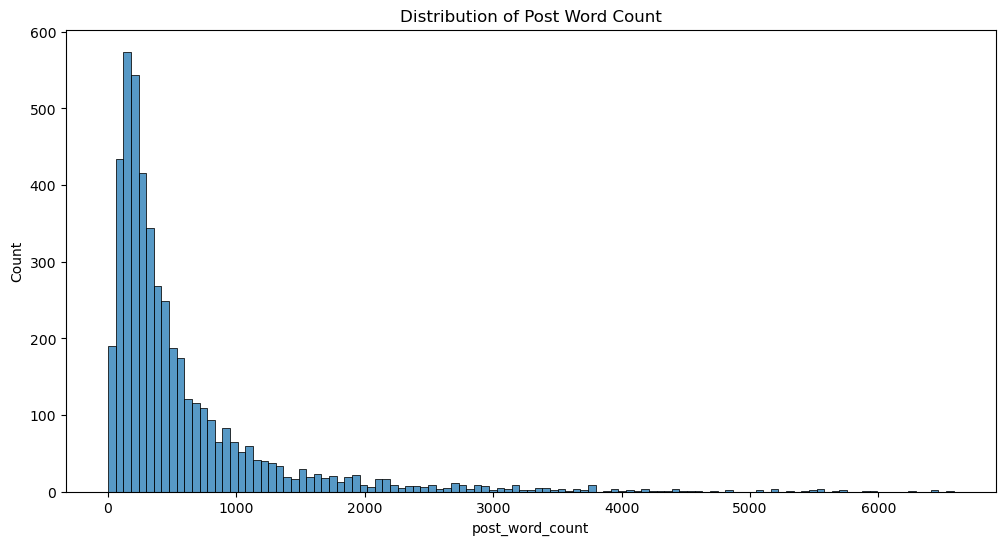

In [197]:
plt.figure(figsize=(12,6))
sns.histplot(reddit_data['post_word_count'])
plt.title('Distribution of Post Word Count');

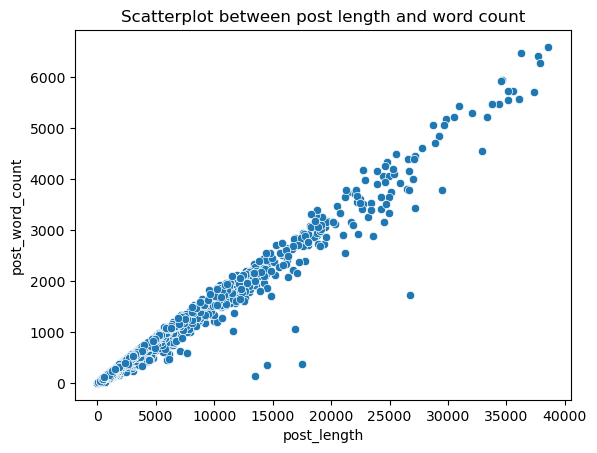

In [198]:
sns.scatterplot(data=reddit_data, x='post_length', y='post_word_count')
plt.title('Scatterplot between post length and word count');

In [203]:
reddit_data[reddit_data.post_word_count==1][['subreddit','post_word_count','post_length','ratio','self_text','score','num_comments']].sort_values(by='post_length')

,subreddit,post_word_count,post_length,ratio,self_text,score,num_comments
4230,FanTheories,1,6,6.0,Right?,1822,207


EDA: CountVectorize

In [201]:
# Top 15 common words
cv = CountVectorizer(stop_words='english')
cv.fit(reddit_data['self_text'])

reddit_data_cv = cv.transform(reddit_data['self_text'])
reddit_data_df = pd.DataFrame(reddit_data_cv.todense(), columns=cv.get_feature_names_out())

In [202]:
reddit_data_top_words = pd.DataFrame(reddit_data_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
reddit_data_top_words

,Count
https,16501
com,11775
www,9499
case,7712
time,7267
police,7248
family,5125
just,5017
like,4879
missing,4780


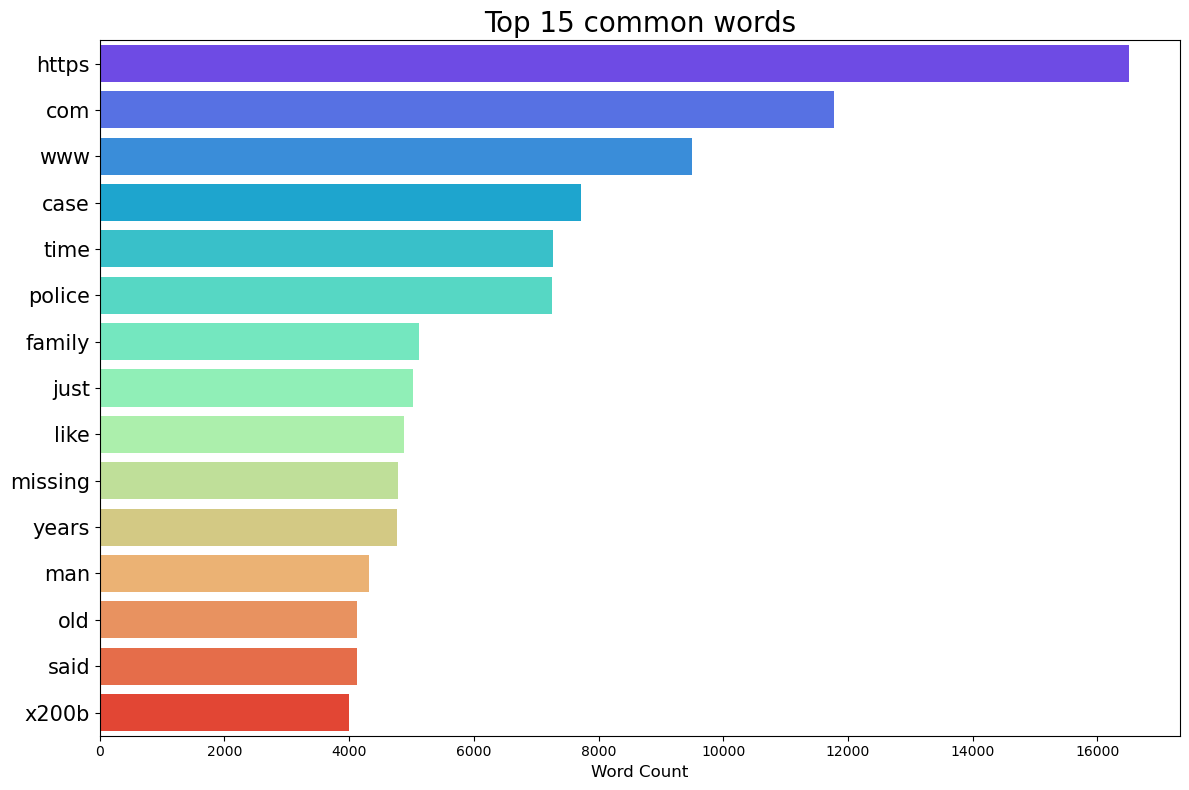

In [204]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Count', y=reddit_data_top_words.index , data=reddit_data_top_words, palette = "rainbow")
plt.title('Top 15 common words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

In [206]:
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(reddit_data['self_text'])

bigrams_cv = cv_bigrams.transform(reddit_data['self_text'])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names_out())

bigrams_df.sum().sort_values(ascending=False).head(15)

reddit_data_top_biwords = pd.DataFrame(bigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
reddit_data_top_biwords

MemoryError: Unable to allocate 29.9 GiB for an array with shape (4730, 848147) and data type int64

In [ ]:
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(reddit_data['self_text'])

trigrams_cv = cv_trigrams.transform(reddit_data['self_text'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names_out())

reddit_data_top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(15), columns = ['Count'])
reddit_data_top_triwords

EDA : Sentiment Analysis

In [ ]:
#identify the columns needed for sentiment analysis
sent_df = reddit_data['subreddit', 'self_text']

sent_df.reset_index(drop=True, inplace=True)

In [ ]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

# Get the sentiment scores
sentiment = [sent.polarity_scores(i) for i in sent_df.self_text]

In [ ]:
sent_df

In [ ]:
sent_score_df = pd.DataFrame(sentiment)
sent_score_df

In [ ]:
sent_combine = pd.concat([sent_df, sent_score_df], axis=1)

In [ ]:
# Create column 'overall' to get a rough understanding on the sentiments

sent_combine['overall'] = 'neu'
for index, row in enumerate(sent_combine['compound']):
    if row <= -0.05:
        sent_combine['overall'][index] = 'neg'
    elif row >= 0.05:
        sent_combine['overall'][index] = 'pos'

In [ ]:
sent_combine

In [ ]:
sent_combine.groupby('subreddit').mean()

In [ ]:
reddit_data_sent = sent_combine[sent_combine.subreddit=='UnresolvedMysteries']
reddit_data_sent.overall.value_counts()*100/len(reddit_data_sent)

In [ ]:
reddit_data_sent = sent_combine[sent_combine.subreddit=='FanTheories']
reddit_data_sent.overall.value_counts()*100/len(reddit_data_sent)

In [ ]:
sns.histplot(data=sent_combine, x='compound', hue='subreddit')
plt.title('Distribution of Compound Score between UnresolvedMysteries and FanTheories');

In [ ]:
sns.histplot(data=sent_combine, x='neg', hue='subreddit')
plt.title('Distribution of Negative Score between UnresolvedMysteries and FanTheories');

In [ ]:
sns.histplot(data=sent_combine, x='pos', hue='subreddit')
plt.title('Distribution of Positive Score between UnresolvedMysteries and FanTheories')

In [ ]:
sns.histplot(data=sent_combine, x='neu', hue='subreddit');
plt.title('Distribution of Neutral Score between UnresolvedMysteries and FanTheories')

Write clean copy of dataset to use for preprocessing and modeling

In [ ]:
# vertical concatenate the 2 dataframes
nlp_df = reddit_data['subreddit', 'self_text']

# map them to the respective binary
nlp_df['subreddit'] = nlp_df['subreddit'].map({'UnresolvedMysteries': 1, 'FanTheories': 0})
nlp_df

In [ ]:
# randomize the order, note that by right it shouldnt matter when doing the train test split later on
nlp_df = nlp_df.sample(frac=1, random_state = 2024).reset_index(drop=True)
nlp_df.head()

In [ ]:
# Export the main nlp_df into csv file for preprocessing and modelling
nlp_df.to_csv('../data/reddit_data_cleaned.csv', index=False)